In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [21]:
dataset = load_diabetes()

In [22]:
df_diabets = pd.DataFrame(dataset.data, columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [23]:
df_diabets.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [24]:
X = df_diabets
y = dataset['target']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

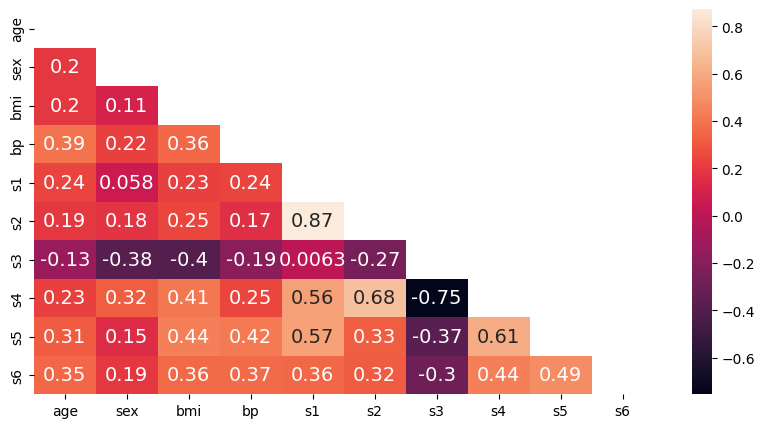

In [26]:
# correlation
mask = np.zeros_like(X_train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # true 1 fasle 0
# visulaise the correlation
plt.figure(figsize=(10, 5))
sns.heatmap(X_train.corr(), mask=mask, annot=True, annot_kws={'size' : 14})
plt.show()

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt_cls = DecisionTreeRegressor() # for post pruning max_depth=2
dt_cls.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error' ],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4 , 5, 10, 20 ,25],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [55]:
from sklearn.model_selection import GridSearchCV

treeModel = DecisionTreeRegressor()


In [56]:
import warnings
warnings.filterwarnings('ignore')

grid = GridSearchCV(dt_cls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [57]:
grid.best_params_


{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'random'}

In [59]:
y_pred = grid.predict(X_test)

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_scores = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('r2_score', r2_scores)
print('mae', mae)
print('mse', mse)

r2_score 0.0754960744544182
mae 62.725563909774436
mse 5849.956766917293


In [64]:
# checking decision tree for bets model

dt_regr =DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=3, max_features='log2')

selectModel = dt_regr.fit(X_train, y_train)



[Text(0.5769230769230769, 0.875, 'x[6] <= 0.11\nabsolute_error = 63.683\nsamples = 309\nvalue = 140.0'),
 Text(0.3076923076923077, 0.625, 'x[3] <= -0.019\nabsolute_error = 63.907\nsamples = 301\nvalue = 141.0'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[8] <= 0.002\nabsolute_error = 49.826\nsamples = 115\nvalue = 109.0'),
 Text(0.07692307692307693, 0.125, 'absolute_error = 37.43\nsamples = 86\nvalue = 97.0'),
 Text(0.23076923076923078, 0.125, 'absolute_error = 71.517\nsamples = 29\nvalue = 180.0'),
 Text(0.46153846153846156, 0.375, 'x[3] <= -0.002\nabsolute_error = 65.484\nsamples = 186\nvalue = 171.5'),
 Text(0.38461538461538464, 0.125, 'absolute_error = 51.348\nsamples = 46\nvalue = 133.0'),
 Text(0.5384615384615384, 0.125, 'absolute_error = 66.086\nsamples = 140\nvalue = 183.5'),
 Text(0.8461538461538461, 0.625, 'x[7] <= -0.052\nabsolute_error = 22.625\nsamples = 8\nvalue = 87.0'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.769230769230

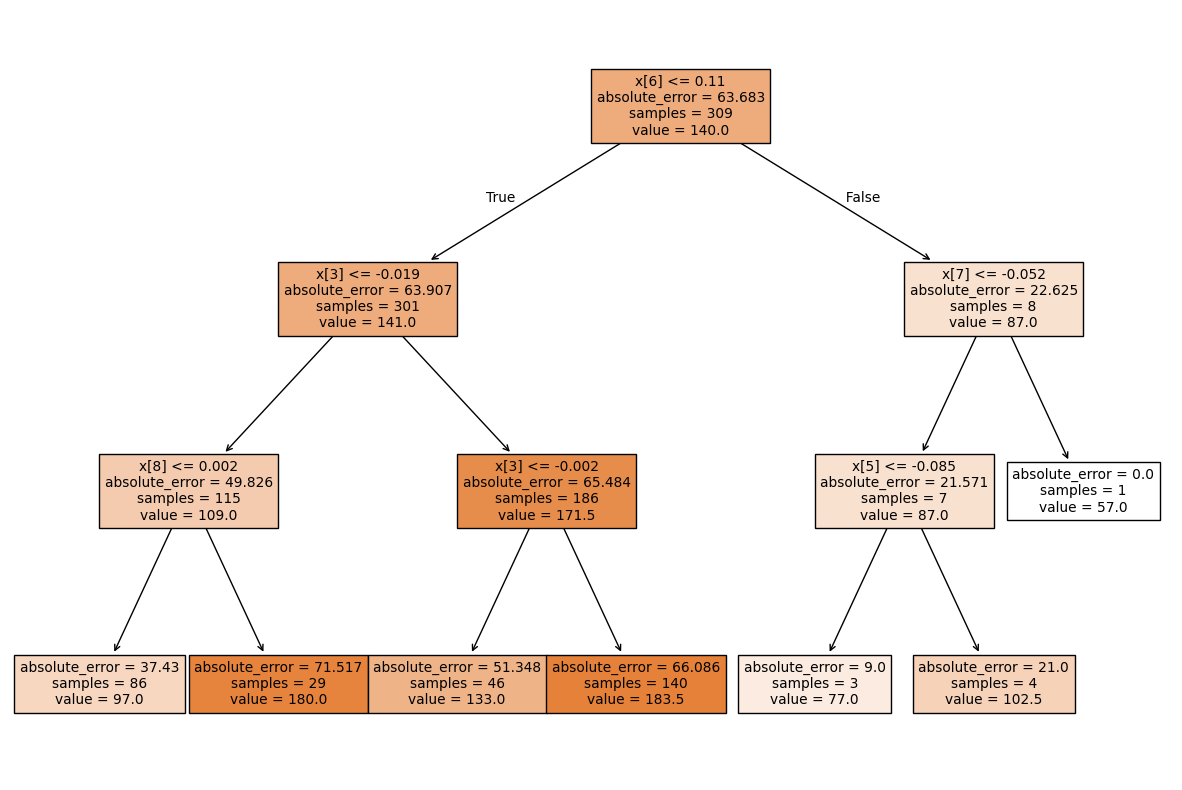

In [65]:
from sklearn import tree

plt.figure(figsize=(15, 10))

tree.plot_tree(dt_regr, filled=True)